In [1]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import shap
import pickle

# Shap analysis - feature importance plus "clustering"

In [3]:
datafile = "Dataset_14_feat.xlsx"

df = pd.read_excel(datafile)

with open('Trained_models/14_feat_RF_model.pkl', 'rb') as file:  
    LGBM_model = pickle.load(file)

X = df.drop(['Experimental_index','DP_Group','Release'],axis='columns')
Y = df['Release']
G = df['DP_Group']

# LGBM Model 

### SHAP Summary plot (Figure 4A)

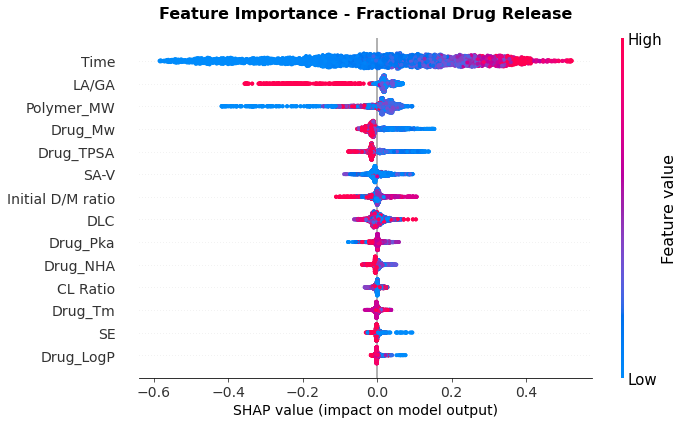

In [4]:
# after standard scalar
shap.initjs()


stdScale = StandardScaler().fit(X)
X_scale=stdScale.transform(X)

explainer = shap.TreeExplainer(LGBM_model)
shap_values = explainer.shap_values(X_scale)

shap.summary_plot(shap_values, X, feature_names=X.columns, show=False, plot_size=(10, 6))

# Get the current figure and axes objects.
fig, ax = plt.gcf(), plt.gca()

# Modifying main plot parameters
ax.tick_params(labelsize=14)
ax.set_xlabel("SHAP value (impact on model output)", fontsize=14)
ax.set_title('Feature Importance - Fractional Drug Release', fontsize=16, weight = "bold", pad = 20)

# Get colorbar
cb_ax = fig.axes[1] 

# Modifying color bar parameters
plt.gcf().axes[-1].set_aspect(100)
plt.gcf().axes[-1].set_box_aspect(100)
cb_ax.tick_params(labelsize=15)
cb_ax.set_ylabel("Feature value", fontsize=16)

plt.tight_layout()

#plt.savefig('Figures/Figure_4/LGBM_SHAP_summary_plot.png', dpi=600, format = 'png', transparent=False)

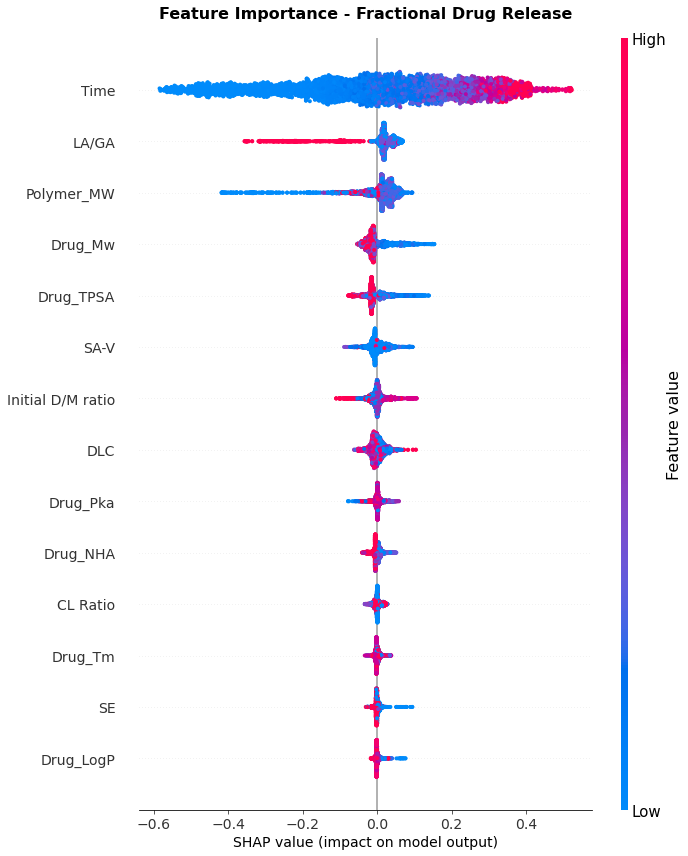

In [5]:
# after standard scalar
shap.initjs()


stdScale = StandardScaler().fit(X)
X_scale=stdScale.transform(X)

explainer = shap.TreeExplainer(LGBM_model)
shap_values = explainer.shap_values(X_scale)

shap.summary_plot(shap_values, X, feature_names=X.columns, show=False, plot_size=(10, 12))

# Get the current figure and axes objects.
fig, ax = plt.gcf(), plt.gca()

# Modifying main plot parameters
ax.tick_params(labelsize=14)
ax.set_xlabel("SHAP value (impact on model output)", fontsize=14)
ax.set_title('Feature Importance - Fractional Drug Release', fontsize=16, weight = "bold", pad = 20)

# Get colorbar
cb_ax = fig.axes[1] 

# Modifying color bar parameters
plt.gcf().axes[-1].set_aspect(100)
plt.gcf().axes[-1].set_box_aspect(100)
cb_ax.tick_params(labelsize=15)
cb_ax.set_ylabel("Feature value", fontsize=16)

plt.tight_layout()

plt.savefig('Figures/Figure_4/zero-shotRF_SHAP_summary_plot_2.png', dpi=600, format = 'png', transparent=False)